KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        50
           1       0.79      0.92      0.85        62
           2       0.67      0.76      0.72        38

    accuracy                           0.78       150
   macro avg       0.78      0.77      0.77       150
weighted avg       0.79      0.78      0.78       150

KNN Accuracy: 0.78

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.32      0.44        50
           1       0.70      0.71      0.70        62
           2       0.51      0.87      0.64        38

    accuracy                           0.62       150
   macro avg       0.64      0.63      0.60       150
weighted avg       0.66      0.62      0.60       150

SVM Accuracy: 0.62


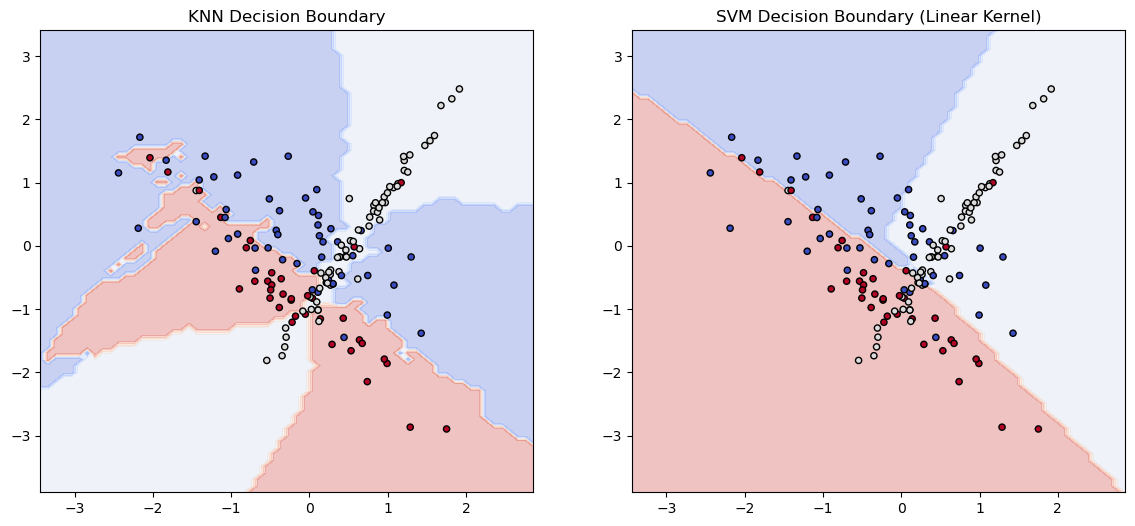

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Generate a synthetic dataset with overlapping classes
X, y = make_classification(
    n_samples=500, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    n_classes=3, 
    class_sep=0.5, 
    flip_y=0.1, 
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))
print(f"KNN Accuracy: {knn_accuracy:.2f}")

# SVM Model with linear kernel (to limit performance on overlapping data)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.coolwarm)

# Plotting the results to visualize decision boundaries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# KNN decision boundary
ax1.set_title("KNN Decision Boundary")
plot_decision_boundary(knn, X_test, y_test, ax=ax1)

# SVM decision boundary
ax2.set_title("SVM Decision Boundary (Linear Kernel)")
plot_decision_boundary(svm, X_test, y_test, ax=ax2)

plt.show()
